In [758]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 15,6
from tqdm import tqdm

In [417]:
data = pd.read_csv('Cristano_Ronaldo_Final_v1/data.csv',index_col = 0)

In [418]:
df = data.copy(deep=True)

In [419]:
df

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.00,50.608,54.2000,38.000
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.00,28.800,22.0000,35.000
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.00,0.000,63.7216,54.400
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.00,122.608,52.0000,42.000
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.00,0.000,19.0000,20.000
5,244.0,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,0.0,...,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.00,3.00,0.000,NaN,34.000
6,251.0,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,1.0,...,"45.539131, -122.651648",NaN,shot - 4,20000012,1610612747,8.00,3.00,0.000,112.2000,89.400
7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,NaN,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,68.64,3.00,0.000,5.0000,22.000
8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,1.0,...,"45.539131, -122.651648",shot - 36,NaN,20000012,1610612747,6.00,3.00,0.000,12.0000,32.000
9,294.0,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,0.0,...,"45.539131, -122.651648",shot - 44,NaN,20000012,1610612747,3.00,3.00,0.000,52.2000,NaN


In [5]:
df.columns

Index(['match_event_id', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'is_goal', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'team_name', 'date_of_game', 'home/away',
       'shot_id_number', 'lat/lng', 'type_of_shot', 'type_of_combined_shot',
       'match_id', 'team_id', 'remaining_min.1', 'power_of_shot.1',
       'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

In [53]:
df.describe()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [371]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [140]:
draw_missing_data_table(df)

,Total,Percent
type_of_combined_shot,15417,0.502231
type_of_shot,15280,0.497769
is_goal,6268,0.204189
game_season,5862,0.190963
remaining_sec,1594,0.051927
shot_basics,1575,0.051308
distance_of_shot.1,1568,0.051080
distance_of_shot,1567,0.051047
lat/lng,1565,0.050982
range_of_shot,1564,0.050950


Note that 'type_of_combined_shot' and 'type_of_shot' has alternate missing values and sort of conveys the same thing.
So combining it into single column

In [372]:
df[['type_of_shot','type_of_combined_shot']]

,type_of_shot,type_of_combined_shot
0,shot - 30,NaN
1,shot - 45,NaN
2,shot - 25,NaN
3,NaN,shot - 3
4,NaN,shot - 1
5,shot - 17,NaN
6,NaN,shot - 4
7,NaN,shot - 3
8,shot - 36,NaN
9,shot - 44,NaN


In [420]:
combined_shot=[]

In [421]:
for i in range(len(df)):
    if type(df['type_of_combined_shot'].iloc[i])==float:
        combined_shot.append(df['type_of_shot'].iloc[i])
        
    else:
        combined_shot.append(df['type_of_combined_shot'].iloc[i])

In [422]:
df['combined_shot'] = combined_shot

In [423]:
df.drop(['type_of_combined_shot','type_of_shot'], axis=1, inplace=True)
df.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,shot_id_number,lat/lng,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,combined_shot
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,...,1.0,"45.539131, -122.651648",20000012,1610612747,10.00,1.0,50.608,54.2000,38.0,shot - 30
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,2.0,"45.539131, -122.651648",20000012,1610612747,10.00,1.0,28.800,22.0000,35.0,shot - 45
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,3.0,"45.539131, -122.651648",20000012,1610612747,92.64,1.0,0.000,63.7216,54.4,shot - 25
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,4.0,"45.539131, -122.651648",20000012,1610612747,NaN,1.0,122.608,52.0000,42.0,shot - 3
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,...,5.0,"45.539131, -122.651648",20000012,1610612747,42.64,2.0,0.000,19.0000,20.0,shot - 1


In [759]:
df['combined_shot'].unique()

array(['shot - 30', 'shot - 45', 'shot - 25', 'shot - 3', 'shot - 1',
       'shot - 17', 'shot - 4', 'shot - 36', 'shot - 44', 'shot - 7',
       'shot - 12', 'shot - 6', 'shot - 20', 'shot - 24', 'shot - 54',
       'shot - 42', 'shot - 34', 'shot - 39', 'shot - 37', 'shot - 14',
       'shot - 21', 'shot - 9', 'shot - 0', 'shot - 2', 'shot - 22',
       'shot - 15', 'shot - 10', 'shot - 49', 'shot - 51', 'shot - 52',
       'shot - 46', 'shot - 5', 'shot - 32', 'shot - 11', 'shot - 56',
       'shot - 47', 'shot - 53', 'shot - 41', 'shot - 40', 'shot - 19',
       'shot - 16', 'shot - 55', 'shot - 23', 'shot - 43', 'shot - 29',
       'shot - 35', 'shot - 31', 'shot - 13', 'shot - 38', 'shot - 26',
       'shot - 28', 'shot - 33', 'shot - 50', 'shot - 8', 'shot - 48',
       'shot - 18', 'shot - 27'], dtype=object)

In [760]:
le = LabelEncoder()

In [761]:
arr = df['combined_shot'].values

In [762]:
le.fit(arr)

LabelEncoder()

In [763]:
le_pred = le.transform(arr)

In [764]:
len(le_pred)

30697

In [765]:
df['combined_shot'] = le_pred

In [377]:
draw_missing_data_table(df)

,Total,Percent
is_goal,6268,0.204189
game_season,5862,0.190963
remaining_sec,1594,0.051927
shot_basics,1575,0.051308
distance_of_shot.1,1568,0.051080
distance_of_shot,1567,0.051047
lat/lng,1565,0.050982
range_of_shot,1564,0.050950
shot_id_number,1563,0.050917
match_event_id,1563,0.050917


In [378]:
df.dtypes

match_event_id        float64
location_x            float64
location_y            float64
remaining_min         float64
power_of_shot         float64
knockout_match        float64
game_season            object
remaining_sec         float64
distance_of_shot      float64
is_goal               float64
area_of_shot           object
shot_basics            object
range_of_shot          object
team_name              object
date_of_game           object
home/away              object
shot_id_number        float64
lat/lng                object
match_id                int64
team_id                 int64
remaining_min.1       float64
power_of_shot.1       float64
knockout_match.1      float64
remaining_sec.1       float64
distance_of_shot.1    float64
combined_shot          object
dtype: object

In [424]:
df.drop(['match_event_id','match_id','team_id'],axis=1,inplace=True)

In [425]:
df.drop('shot_id_number',axis=1,inplace=True)

In [426]:
df

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,...,team_name,date_of_game,home/away,lat/lng,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,combined_shot
0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),...,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",10.00,1.00,50.608,54.2000,38.000,shot - 30
1,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),...,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",10.00,1.00,28.800,22.0000,35.000,shot - 45
2,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),...,Manchester United,2000-10-31,NaN,"45.539131, -122.651648",92.64,1.00,0.000,63.7216,54.400,shot - 25
3,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),...,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",NaN,1.00,122.608,52.0000,42.000,shot - 3
4,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),...,NaN,2000-10-31,MANU @ POR,"45.539131, -122.651648",42.64,2.00,0.000,19.0000,20.000,shot - 1
5,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,0.0,Left Side(L),...,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",9.00,3.00,0.000,NaN,34.000,shot - 17
6,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,1.0,Center(C),...,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",8.00,3.00,0.000,112.2000,89.400,shot - 4
7,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,NaN,Center(C),...,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",68.64,3.00,0.000,5.0000,22.000,shot - 3
8,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,1.0,Left Side(L),...,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",6.00,3.00,0.000,12.0000,32.000,shot - 36
9,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,0.0,Center(C),...,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",3.00,3.00,0.000,52.2000,NaN,shot - 44


Lets take columns one-by-one

1. Game Season

In [685]:
df['game_season'].unique()

array(['2000-01', nan, '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '1996-97',
       '1997-98', '1998-99', '1999-00'], dtype=object)

In [691]:
import datetime

In [693]:
df['date_of_game'] = pd.to_datetime(df['date_of_game'],format='%Y-%m-%d')

In [734]:
with tqdm(total=len(df)) as pbar:
    for i,row in df.iterrows():
        if pd.isnull(df['game_season'][i]):
            if datetime.datetime(1999,4,30)<df['date_of_game'][i] and df['date_of_game'][i]< datetime.datetime(2000, 4, 30):
                df['game_season'][i] = '1999-00'
        pbar.update(1)

 80%|████████  | 24688/30697 [00:02<00:00, 8786.17it/s]/media/aayush/New-Volume/A_property/kaggle/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
100%|██████████| 30697/30697 [03:31<00:00, 145.27it/s] 


In [735]:
df['game_season'].isnull().sum()

687

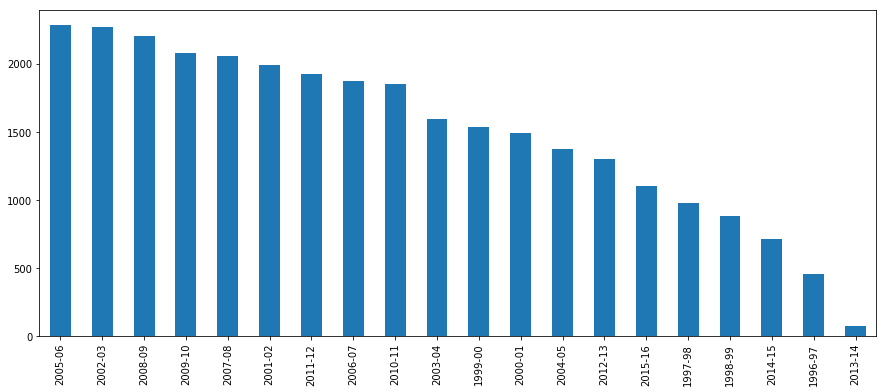

In [737]:
df['game_season'].value_counts().plot.bar()

In [742]:
test = np.random.choice(df['game_season'].dropna().values)

In [743]:
test

'2002-03'

In [744]:
df['game_season'].fillna(np.random.choice(df['game_season'].dropna().values),inplace=True)

In [745]:
df.drop('date_of_game',axis=1,inplace=True)

In [820]:
le = LabelEncoder()

In [821]:
arr = df['game_season'].values

In [822]:
le.fit(arr)

LabelEncoder()

In [823]:
le_pred = le.transform(arr)

In [824]:
len(le_pred)

30697

In [826]:
df['game_season'] = le_pred

In [827]:
df['game_season']

0         4
1         4
2         4
3         4
4         4
5        13
6         4
7         4
8         4
9         4
10        4
11        4
12       13
13        4
14        4
15        4
16        4
17        4
18        4
19       13
20        4
21       13
22        4
23       13
24        4
25        4
26        4
27        4
28        4
29        4
         ..
30667     3
30668     3
30669    13
30670     3
30671     3
30672     3
30673    13
30674     3
30675    13
30676     3
30677     3
30678     3
30679     3
30680    13
30681     3
30682     3
30683     3
30684    13
30685     3
30686    13
30687     3
30688     3
30689     3
30690     3
30691     3
30692     3
30693     3
30694     3
30695     3
30696     3
Name: game_season, Length: 30697, dtype: int64

2. Remaining_sec and remaining_sec.1 and remaining_min and .1

In [110]:
corr = df.corr()

In [113]:
import seaborn as sns

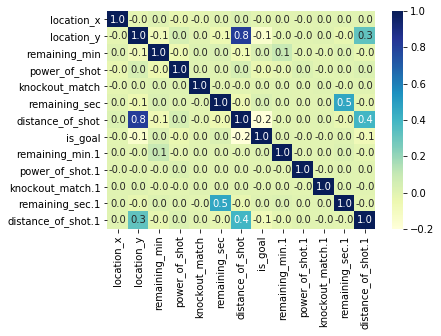

In [114]:
sns.heatmap(corr,annot=True,fmt=".1f",cmap="YlGnBu")

In [647]:
df[(df['remaining_sec']==df['remaining_sec.1'])][['remaining_sec','remaining_sec.1']]

,remaining_sec,remaining_sec.1
1,22.0,22.0
3,52.0,52.0
4,19.0,19.0
7,5.0,5.0
8,12.0,12.0
10,56.0,56.0
13,44.0,44.0
14,16.0,16.0
16,1.0,1.0
17,50.0,50.0


In [648]:
unval = df['remaining_sec'].unique()

In [650]:
unval = np.delete(unval,11)

In [651]:
unval

array([27., 22., 45., 52., 19., 32.,  5., 12., 36., 56.,  0., 44., 16.,
        1., 50., 29., 46.,  8.,  4., 57., 47., 11., 30., 20., 26., 58.,
       33.,  9., 13., 59., 21., 55.,  6., 40., 10.,  2., 37., 17., 53.,
       15., 24., 49., 41., 48., 54., 25., 39., 14., 38., 43., 23., 18.,
       34., 51., 28.,  3.,  7., 42., 35., 31.])

In [652]:
with tqdm(total=len(df)) as pbar:
    for i in range(len(df)):
        if np.isnan(df['remaining_sec'].iloc[i]):
            if df['remaining_sec.1'].iloc[i] in unval:
                df['remaining_sec'].iloc[i] = df['remaining_sec.1'].iloc[i]
                
        pbar.update(1)

100%|██████████| 30697/30697 [25:01<00:00, 20.45it/s]  


In [653]:
df['remaining_sec'].isnull().sum()

415

In [607]:
df[['remaining_min','remaining_min.1']]

,remaining_min,remaining_min.1
0,10.0,10.00
1,10.0,10.00
2,7.0,92.64
3,6.0,NaN
4,NaN,42.64
5,9.0,9.00
6,8.0,8.00
7,8.0,68.64
8,6.0,6.00
9,3.0,3.00


In [654]:
unval = df['remaining_min'].unique()

In [656]:
unval = np.delete(unval,3)

In [655]:
unval

array([10.,  7.,  6., nan,  9.,  8.,  3.,  1., 11.,  0.,  5.,  2.,  4.])

In [657]:
with tqdm(total=len(df)) as pbar:
    for i in range(len(df)):
        if np.isnan(df['remaining_min'].iloc[i]):
            if df['remaining_min.1'].iloc[i] in unval:
                df['remaining_min'].iloc[i] = df['remaining_min.1'].iloc[i]
                
        pbar.update(1)

100%|██████████| 30697/30697 [16:08<00:00, 31.69it/s]  


In [659]:
df.drop(['remaining_min.1','remaining_sec.1'],axis=1,inplace=True)

In [660]:
draw_missing_data_table(df)

,Total,Percent
is_goal,6268,0.204189
game_season,5862,0.190963
date_of_game,1550,0.050494
remaining_total,792,0.025801
remaining_sec,415,0.013519
remaining_min,383,0.012477
power_of_shot,357,0.011630
location,93,0.003030
distance_of_shot,93,0.003030
lat/lng,79,0.002574


3. shot_basics

In [779]:
df['shot_basics'].unique()

array(['Mid Range', 'Goal Area', 'Goal Line', 'Penalty Spot', nan,
       'Right Corner', 'Mid Ground Line', 'Left Corner'], dtype=object)

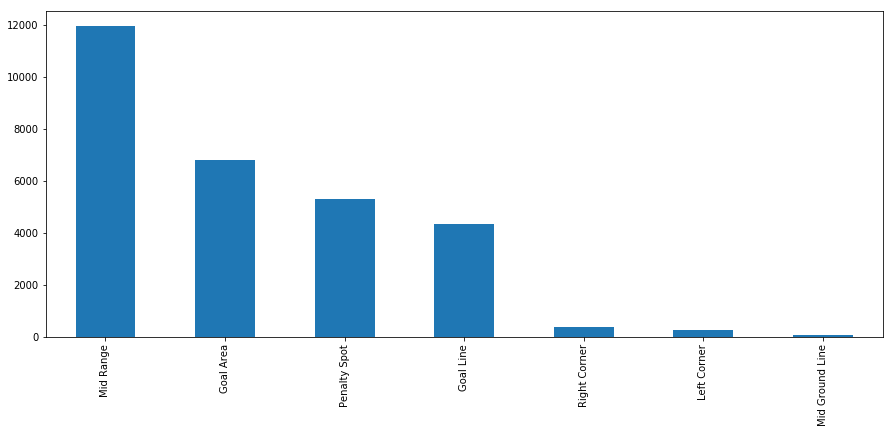

In [780]:
df['shot_basics'].value_counts().plot(kind='bar')

In [781]:
df['shot_basics'].mode()[0]

'Mid Range'

In [782]:
df['shot_basics'].fillna(df['shot_basics'].mode()[0],inplace=True)

In [783]:
le = LabelEncoder()

In [784]:
arr = df['shot_basics'].values

In [785]:
le.fit(arr)

LabelEncoder()

In [786]:
le_pred = le.transform(arr)

In [787]:
len(le_pred)

30697

In [788]:
df['shot_basics'] = le_pred

In [789]:
df['shot_basics'].unique()

array([4, 0, 1, 5, 6, 3, 2])

4. distance_of_shot,location_y,location_x

In [502]:
tmp_df = df[['location_x','location_y','distance_of_shot']]

In [503]:
tmp_df['location']= np.sqrt(pow(tmp_df['location_x'],2)+pow(tmp_df['location_y'],2))

/media/aayush/New-Volume/A_property/kaggle/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [504]:
tmp_df.shape

(30697, 4)

In [505]:
corr = tmp_df.corr()

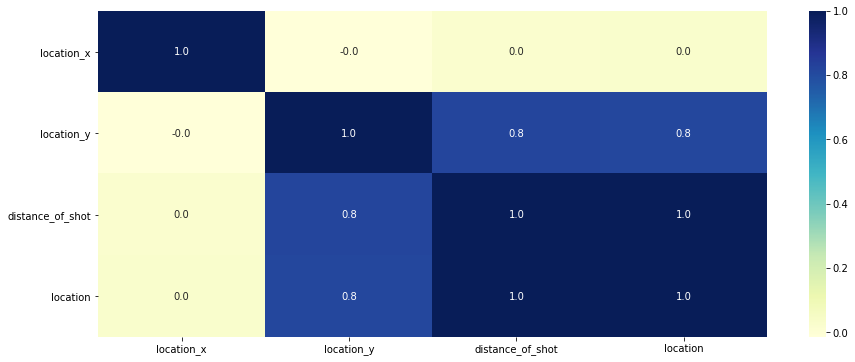

In [506]:
sns.heatmap(corr,annot=True,fmt=".1f",cmap="YlGnBu")

In [487]:
tmp_df[['location','distance_of_shot']]

,location,distance_of_shot
0,181.859836,38.0
1,157.000000,35.0
2,168.600119,36.0
3,222.865430,42.0
4,0.000000,20.0
5,145.416643,34.0
6,0.000000,20.0
7,28.017851,22.0
8,NaN,32.0
9,NaN,32.0


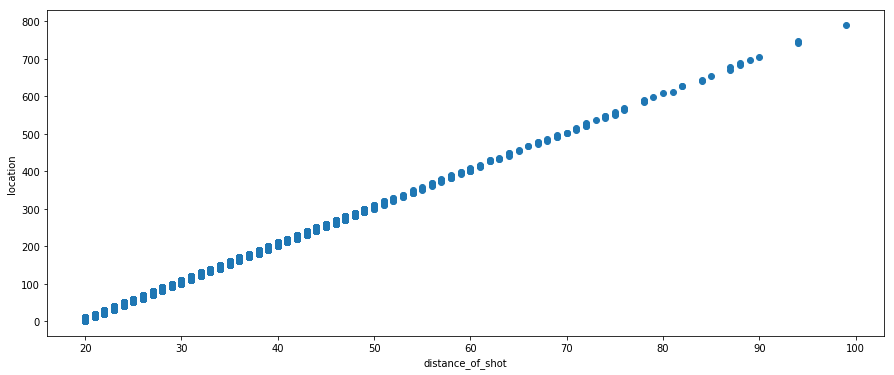

In [488]:
rcParams['figure.figsize']= 15,6
plt.scatter(tmp_df['distance_of_shot'],tmp_df['location'] )
plt.xlabel('distance_of_shot')
plt.ylabel('location')
plt.show()

In [510]:
tmp1_df = tmp_df.dropna()

In [511]:
tmp1_df.shape

(26371, 4)

In [512]:
X = tmp1_df['location'].values

In [514]:
y = tmp1_df['distance_of_shot'].values

In [515]:
X.shape,y.shape

((26371,), (26371,))

In [516]:
m,b = np.polyfit(X, y, 1)

In [517]:
m,b

(0.09870290509957232, 19.770151599444688)

In [518]:
fit = np.polyfit(X,y,1)

In [519]:
fit_fn = np.poly1d(fit)

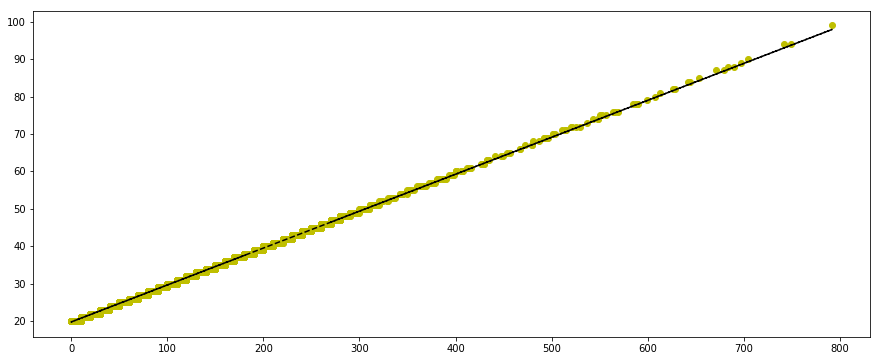

In [520]:
plt.plot(X,y, 'yo', X, fit_fn(X), '--k')

In [531]:
ds = tmp_df['distance_of_shot'].values
ly = tmp_df['location'].values

In [532]:
ds.shape,ly.shape

((30697,), (30697,))

In [533]:
for i in range(len(tmp_df)):
    if np.isnan(ds[i]):
        ds[i] = m*ly[i]+b

In [534]:
for i in range(len(tmp_df)):
    if np.isnan(ly[i]):
        ly[i] = (ds[i]-b)/m

In [535]:
ds[12],ly[12]

(nan, nan)

In [536]:
ds.shape

(30697,)

In [537]:
tmp_df[['distance_of_shot','location']].isnull().sum()

distance_of_shot    93
location            93
dtype: int64

In [529]:
tmp_df['distance_of_shot'].isnull().sum()

93

In [538]:
df.drop(['distance_of_shot','location_x','location_y'],axis=1,inplace=True)

In [539]:
df['distance_of_shot'] = ds

In [540]:
df['location'] = ly

In [721]:
df['distance_of_shot'].unique()

array([38.        , 35.        , 36.        , 42.        , 20.        ,
       34.        , 22.        , 32.        , 45.        , 37.        ,
               nan, 29.        , 25.        , 40.        , 31.        ,
       27.        , 46.        , 39.        , 28.        , 20.16496322,
       33.        , 21.        , 47.        , 48.        , 44.        ,
       43.        , 25.39621719, 24.        , 41.        , 19.7701516 ,
       67.        , 30.        , 49.        , 21.6455068 , 37.93148614,
       34.97039898, 30.03525373, 35.85872513, 62.        , 23.        ,
       68.        , 21.05328937, 26.48194915, 23.7182678 , 50.        ,
       44.14976916, 65.        , 40.00424714, 26.        , 35.56261642,
       21.84291261, 53.        , 19.57274579, 32.89763798, 56.        ,
       27.86378982, 82.        , 34.37818155, 22.73123875, 37.2405658 ,
       36.45094256, 21.44810099, 39.31332681, 18.28960802, 36.64834837,
       37.63537742, 31.81190602, 38.32629776, 30.23265954, 51.  

In [750]:
test = np.random.choice(df['distance_of_shot'].dropna().values)

In [751]:
test

20.0

In [752]:
with tqdm(total=len(df)) as pbar:
    for i in range(len(df)):
        if np.isnan(df['distance_of_shot'].iloc[i]):
            df['distance_of_shot'].iloc[i] = np.random.choice(df['distance_of_shot'].dropna().values)
            df['location'].iloc[i] = (df['distance_of_shot'].iloc[i]-b)/m
        
        pbar.update(1)

  0%|          | 0/30697 [00:00<?, ?it/s]/media/aayush/New-Volume/A_property/kaggle/kaggle/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 30697/30697 [02:19<00:00, 220.30it/s]


In [753]:
df['distance_of_shot'].isnull().sum()

0

In [541]:
draw_missing_data_table(df)

,Total,Percent
is_goal,6268,0.204189
game_season,5862,0.190963
distance_of_shot.1,1568,0.051080
lat/lng,1565,0.050982
range_of_shot,1564,0.050950
remaining_min,1562,0.050884
date_of_game,1550,0.050494
power_of_shot.1,1539,0.050135
remaining_sec.1,1539,0.050135
remaining_min.1,1535,0.050005


5. lat/lng and home/away

In [392]:
df['lat/lng'].unique()

array(['45.539131, -122.651648', '42.982923, -71.446094',
       '49.250068, -123.114646', nan, '29.740325, -95.365762',
       '29.444994, -98.524120', '38.567296, -121.456638',
       '39.739968, -104.954013', '34.189593, -118.471724',
       '47.633181, -122.308343', '37.754130, -122.437947',
       '43.717098, -79.395917', '25.790710, -80.207819',
       '32.757824, -96.786653', '33.552026, -112.071667',
       '40.774891, -111.930790', '40.708999, -73.872430',
       '41.484971, -81.671552', '46.667324, -94.419250',
       '40.643505, -73.939507', '39.993941, -75.143458',
       '35.205878, -80.841194', '40.361408, -86.186052',
       '42.379455, -83.115635', '38.919619, -77.015211',
       '28.549237, -81.372780', '33.768092, -84.393817',
       '43.062206, -87.944754', '35.103812, -89.964007',
       '41.845137, -87.660450', '42.330507, -71.074655',
       '30.018061, -90.022651', '40.324211, -111.674849',
       '30.028164, -89.997933', '33.513157, -112.082793',
       '35.2620

In [586]:
df['home/away'].unique()

array(['MANU @ POR', nan, 'MANU vs. UTA', 'MANU @ VAN', 'MANU vs. LAC',
       'MANU @ HOU', 'MANU @ SAS', 'MANU vs. HOU', 'MANU vs. DEN',
       'MANU @ SAC', 'MANU @ DEN', 'MANU vs. CHI', 'MANU vs. GSW',
       'MANU vs. MIN', 'MANU @ LAC', 'MANU vs. IND', 'MANU @ SEA',
       'MANU vs. SAS', 'MANU vs. DAL', 'MANU vs. PHI', 'MANU @ GSW',
       'MANU vs. SEA', 'MANU vs. DET', 'MANU vs. MIL', 'MANU vs. VAN',
       'MANU @ TOR', 'MANU @ MIA', 'MANU @ DAL', 'MANU vs. POR',
       'MANU @ PHX', 'MANU vs. CLE', 'MANU @ UTA', 'MANU vs. MIA',
       'MANU vs. NJN', 'MANU @ NYK', 'MANU @ CLE', 'MANU @ MIN',
       'MANU vs. CHH', 'MANU vs. SAC', 'MANU vs. PHX', 'MANU @ NJN',
       'MANU @ PHI', 'MANU @ CHH', 'MANU @ IND', 'MANU vs. TOR',
       'MANU @ DET', 'MANU @ WAS', 'MANU @ ORL', 'MANU @ ATL',
       'MANU @ MIL', 'MANU vs. NYK', 'MANU vs. MEM', 'MANU vs. ORL',
       'MANU @ MEM', 'MANU @ CHI', 'MANU vs. WAS', 'MANU vs. ATL',
       'MANU vs. BOS', 'MANU @ BOS', 'MANU vs. NOH', 'MAN

In [587]:
temp_df = df[['lat/lng','home/away']].dropna().to_dict(orient='records')

In [588]:
temp_df

[{'lat/lng': '45.539131, -122.651648', 'home/away': 'MANU @ POR'},
 {'lat/lng': '45.539131, -122.651648', 'home/away': 'MANU @ POR'},
 {'lat/lng': '45.539131, -122.651648', 'home/away': 'MANU @ POR'},
 {'lat/lng': '45.539131, -122.651648', 'home/away': 'MANU @ POR'},
 {'lat/lng': '45.539131, -122.651648', 'home/away': 'MANU @ POR'},
 {'lat/lng': '45.539131, -122.651648', 'home/away': 'MANU @ POR'},
 {'lat/lng': '45.539131, -122.651648', 'home/away': 'MANU @ POR'},
 {'lat/lng': '45.539131, -122.651648', 'home/away': 'MANU @ POR'},
 {'lat/lng': '45.539131, -122.651648', 'home/away': 'MANU @ POR'},
 {'lat/lng': '42.982923, -71.446094', 'home/away': 'MANU vs. UTA'},
 {'lat/lng': '42.982923, -71.446094', 'home/away': 'MANU vs. UTA'},
 {'lat/lng': '42.982923, -71.446094', 'home/away': 'MANU vs. UTA'},
 {'lat/lng': '42.982923, -71.446094', 'home/away': 'MANU vs. UTA'},
 {'lat/lng': '42.982923, -71.446094', 'home/away': 'MANU vs. UTA'},
 {'lat/lng': '42.982923, -71.446094', 'home/away': 'MANU 

In [589]:
homeaway_dict = dict(((v['home/away'],v) for v in temp_df))

In [590]:
homeaway_dict['MANU @ POR']['lat/lng']

'45.539131, -122.651648'

In [602]:
homeaway = df['home/away'].unique()

In [604]:
homeaway = np.delete(homeaway,1)

In [605]:
homeaway

array(['MANU @ POR', 'MANU vs. UTA', 'MANU @ VAN', 'MANU vs. LAC',
       'MANU @ HOU', 'MANU @ SAS', 'MANU vs. HOU', 'MANU vs. DEN',
       'MANU @ SAC', 'MANU @ DEN', 'MANU vs. CHI', 'MANU vs. GSW',
       'MANU vs. MIN', 'MANU @ LAC', 'MANU vs. IND', 'MANU @ SEA',
       'MANU vs. SAS', 'MANU vs. DAL', 'MANU vs. PHI', 'MANU @ GSW',
       'MANU vs. SEA', 'MANU vs. DET', 'MANU vs. MIL', 'MANU vs. VAN',
       'MANU @ TOR', 'MANU @ MIA', 'MANU @ DAL', 'MANU vs. POR',
       'MANU @ PHX', 'MANU vs. CLE', 'MANU @ UTA', 'MANU vs. MIA',
       'MANU vs. NJN', 'MANU @ NYK', 'MANU @ CLE', 'MANU @ MIN',
       'MANU vs. CHH', 'MANU vs. SAC', 'MANU vs. PHX', 'MANU @ NJN',
       'MANU @ PHI', 'MANU @ CHH', 'MANU @ IND', 'MANU vs. TOR',
       'MANU @ DET', 'MANU @ WAS', 'MANU @ ORL', 'MANU @ ATL',
       'MANU @ MIL', 'MANU vs. NYK', 'MANU vs. MEM', 'MANU vs. ORL',
       'MANU @ MEM', 'MANU @ CHI', 'MANU vs. WAS', 'MANU vs. ATL',
       'MANU vs. BOS', 'MANU @ BOS', 'MANU vs. NOH', 'MANU @ N

In [606]:
with tqdm(total=len(df)) as pbar:
    for i in range(len(df)):
        if pd.isna(df['lat/lng'].iloc[i]):
            if df['home/away'].iloc[i] in homeaway:
                df['lat/lng'].iloc[i] = homeaway_dict[df['home/away'][i]]['lat/lng']
                
        pbar.update(1)

  0%|          | 0/30697 [00:00<?, ?it/s]/media/aayush/New-Volume/A_property/kaggle/kaggle/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 30697/30697 [20:03<00:00, 25.52it/s]  


In [638]:
df.drop('home/away',axis=1,inplace=True)

In [705]:
df['lat/lng'].fillna(df['lat/lng'].mode()[0],inplace=True)

In [715]:
df['lat/lng'].iloc[0].split(',')[1]

' -122.651648'

In [709]:
def fill_lat(x):
    lat = x['lat/lng'].split(',')[0]
    return float(lat)

df['latitude'] = df.apply(lambda x:fill_lat(x),axis=1)

In [716]:
def fill_long(x):
    long = x['lat/lng'].split(',')[1]
    return float(long)

df['longitude'] = df.apply(lambda x:fill_long(x),axis=1)

In [717]:
df[['latitude','longitude']]

,latitude,longitude
0,45.539131,-122.651648
1,45.539131,-122.651648
2,45.539131,-122.651648
3,45.539131,-122.651648
4,45.539131,-122.651648
5,45.539131,-122.651648
6,45.539131,-122.651648
7,45.539131,-122.651648
8,45.539131,-122.651648
9,45.539131,-122.651648


In [719]:
df.drop('lat/lng',axis=1,inplace=True)

In [720]:
draw_missing_data_table(df)

,Total,Percent
is_goal,6268,0.204189
game_season,3066,0.099879
date_of_game,1550,0.050494
location,93,0.003030
distance_of_shot,93,0.003030
longitude,0,0.000000
latitude,0,0.000000
remaining_total,0,0.000000
knockout_match,0,0.000000
combined_shot,0,0.000000


In [545]:
df.to_csv('Cristano_Ronaldo_Final_v1/inter_step1.csv',index=False)

In [546]:
df =  pd.read_csv('Cristano_Ronaldo_Final_v1/inter_step1.csv')

In [547]:
df

,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,is_goal,area_of_shot,shot_basics,team_name,date_of_game,home/away,lat/lng,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,combined_shot,distance_of_shot,location
0,10.0,1.0,0.0,2000-01,27.0,NaN,Right Side(R),Mid Range,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",10.00,1.00,50.608,54.2000,38.000,shot - 30,38.000000,181.859836
1,10.0,1.0,0.0,2000-01,22.0,0.0,Left Side(L),Mid Range,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",10.00,1.00,28.800,22.0000,35.000,shot - 45,35.000000,157.000000
2,7.0,1.0,0.0,2000-01,45.0,1.0,Left Side Center(LC),Mid Range,Manchester United,2000-10-31,NaN,"45.539131, -122.651648",92.64,1.00,0.000,63.7216,54.400,shot - 25,36.000000,168.600119
3,6.0,1.0,0.0,2000-01,52.0,0.0,Right Side Center(RC),Mid Range,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",NaN,1.00,122.608,52.0000,42.000,shot - 3,42.000000,222.865430
4,NaN,2.0,0.0,2000-01,19.0,1.0,Center(C),Goal Area,NaN,2000-10-31,MANU @ POR,"45.539131, -122.651648",42.64,2.00,0.000,19.0000,20.000,shot - 1,20.000000,0.000000
5,9.0,3.0,0.0,NaN,32.0,0.0,Left Side(L),Mid Range,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",9.00,3.00,0.000,NaN,34.000,shot - 17,34.000000,145.416643
6,8.0,NaN,0.0,2000-01,52.0,1.0,Center(C),Goal Area,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",8.00,3.00,0.000,112.2000,89.400,shot - 4,20.000000,0.000000
7,8.0,3.0,0.0,2000-01,5.0,NaN,Center(C),Goal Area,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",68.64,3.00,0.000,5.0000,22.000,shot - 3,22.000000,28.017851
8,6.0,3.0,0.0,2000-01,12.0,1.0,Left Side(L),Goal Line,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",6.00,3.00,0.000,12.0000,32.000,shot - 36,32.000000,123.905658
9,3.0,3.0,0.0,2000-01,36.0,0.0,Center(C),Goal Line,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",3.00,3.00,0.000,52.2000,NaN,shot - 44,32.000000,123.905658


range_of_shot

In [543]:
df.drop('range_of_shot',axis=1,inplace=True)

In [544]:
draw_missing_data_table(df)

,Total,Percent
is_goal,6268,0.204189
game_season,5862,0.190963
distance_of_shot.1,1568,0.051080
lat/lng,1565,0.050982
remaining_min,1562,0.050884
date_of_game,1550,0.050494
power_of_shot.1,1539,0.050135
remaining_sec.1,1539,0.050135
remaining_min.1,1535,0.050005
team_name,1535,0.050005


remaining_sec and remaining_min

In [333]:
df[(df['remaining_min']==0)][['remaining_min','remaining_sec']]

,remaining_min,remaining_sec
15,0.0,28.329382
16,0.0,1.000000
27,0.0,30.000000
31,0.0,30.000000
39,0.0,4.000000
61,0.0,47.000000
63,0.0,37.000000
64,0.0,1.000000
74,0.0,28.329382
78,0.0,1.000000


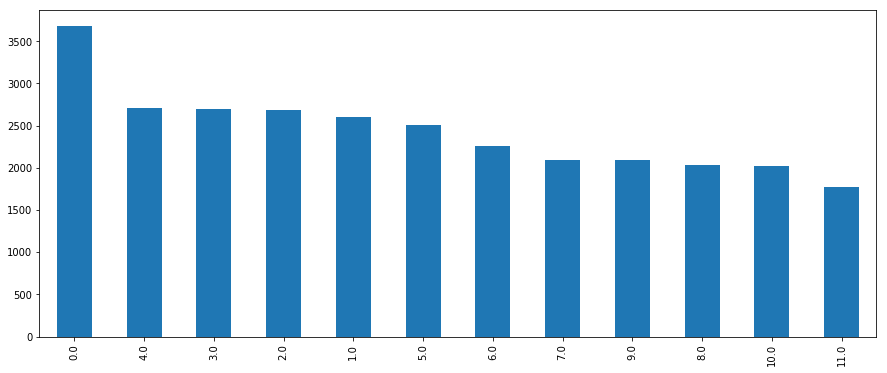

In [324]:
df['remaining_min'].value_counts().plot.bar()

In [664]:
df['remaining_min'].fillna(0,inplace=True)

In [666]:
df['remaining_sec'].fillna(0,inplace=True)

In [667]:
df['remaining_total'] = df['remaining_min']*60+df['remaining_sec']

In [668]:
df.drop(['remaining_min','remaining_sec'],axis=1,inplace=True)

In [669]:
df.isnull().sum()

power_of_shot        357
game_season         5862
is_goal             6268
area_of_shot           0
shot_basics            0
date_of_game        1550
lat/lng               79
combined_shot          0
distance_of_shot      93
location              93
knockout_match         0
remaining_total        0
dtype: int64

area_of_shot

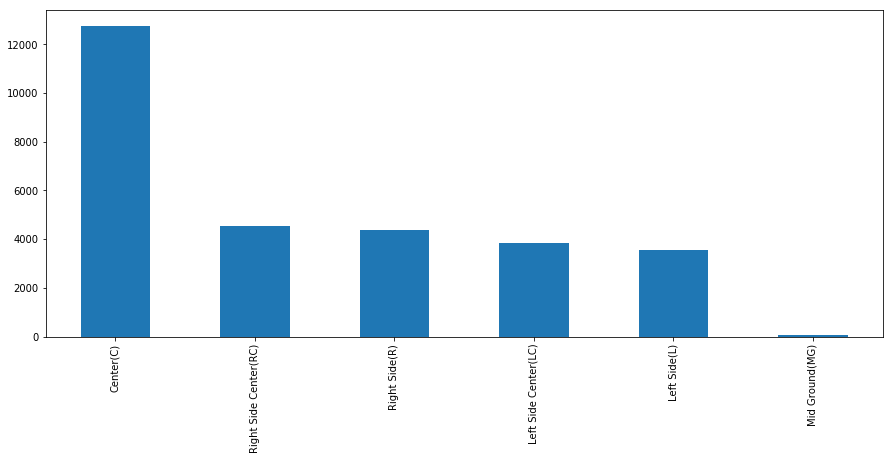

In [767]:
df['area_of_shot'].value_counts().plot.bar()

In [768]:
df['area_of_shot'].isnull().sum()

1502

In [769]:
df['area_of_shot'].fillna(df['area_of_shot'].mode()[0],inplace=True)

In [770]:
df['area_of_shot'].isnull().sum()

0

In [771]:
le = LabelEncoder()

In [772]:
arr = df['area_of_shot'].values

In [773]:
le.fit(arr)

LabelEncoder()

In [774]:
le_pred = le.transform(arr)

In [775]:
len(le_pred)

30697

In [776]:
df['area_of_shot'] = le_pred

In [777]:
df['area_of_shot']

0        5
1        2
2        1
3        4
4        0
5        2
6        0
7        0
8        2
9        0
10       1
11       4
12       2
13       2
14       0
15       0
16       0
17       1
18       1
19       0
20       0
21       4
22       0
23       1
24       0
25       0
26       0
27       1
28       4
29       0
        ..
30667    0
30668    0
30669    0
30670    0
30671    0
30672    5
30673    5
30674    4
30675    1
30676    2
30677    1
30678    0
30679    0
30680    0
30681    0
30682    2
30683    0
30684    2
30685    0
30686    0
30687    0
30688    2
30689    3
30690    2
30691    0
30692    0
30693    0
30694    1
30695    0
30696    0
Name: area_of_shot, Length: 30697, dtype: int64

In [570]:
draw_missing_data_table(df)

,Total,Percent
is_goal,6268,0.204189
game_season,5862,0.190963
distance_of_shot.1,1568,0.051080
lat/lng,1565,0.050982
remaining_min,1562,0.050884
date_of_game,1550,0.050494
power_of_shot.1,1539,0.050135
remaining_sec.1,1539,0.050135
remaining_min.1,1535,0.050005
team_name,1535,0.050005


In [568]:
df.to_csv('Cristano_Ronaldo_Final_v1/inter_step2.csv',index=False)

In [569]:
df = pd.read_csv('Cristano_Ronaldo_Final_v1/inter_step2.csv')

Dealing with .1s

1. power_of_shot

In [561]:
df[['power_of_shot','power_of_shot.1']]

,power_of_shot,power_of_shot.1
0,1.0,1.00
1,1.0,1.00
2,1.0,1.00
3,1.0,1.00
4,2.0,2.00
5,3.0,3.00
6,NaN,3.00
7,3.0,3.00
8,3.0,3.00
9,3.0,3.00


In [571]:
unval = df['power_of_shot'].unique()

In [572]:
unval = np.delete(unval,3)

In [573]:
unval

array([1., 2., 3., 4., 5., 6., 7.])

In [574]:
for i in range(len(df)):
    if np.isnan(df['power_of_shot'].iloc[i]):
        if df['power_of_shot.1'].iloc[i] in unval:
            df['power_of_shot'].iloc[i] = df['power_of_shot.1'].iloc[i]

In [576]:
df['power_of_shot'].isnull().sum()

357

In [ ]:
df.drop(['power_of_shot.1'],axis=1,inplace=True)

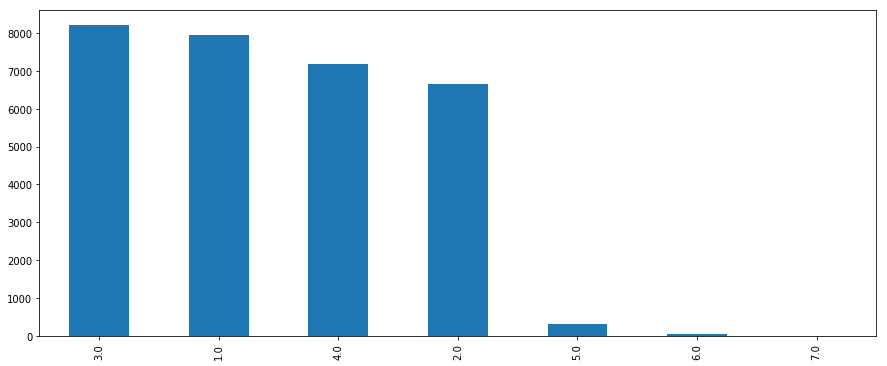

In [673]:
df['power_of_shot'].value_counts().plot.bar()

In [680]:
df['power_of_shot'].fillna(np.random.choice(df['power_of_shot'].dropna().values),inplace=True)

In [681]:
df['power_of_shot'].isnull().sum()

0

2. knockoutmatch

In [583]:
df['knockout_match'].fillna(df['knockout_match'].mode()[0],inplace=True)

In [584]:
df.drop(['knockout_match.1'],axis=1,inplace=True)

In [585]:
draw_missing_data_table(df)

,Total,Percent
is_goal,6268,0.204189
game_season,5862,0.190963
distance_of_shot.1,1568,0.051080
lat/lng,1565,0.050982
remaining_min,1562,0.050884
date_of_game,1550,0.050494
remaining_sec.1,1539,0.050135
power_of_shot.1,1539,0.050135
remaining_min.1,1535,0.050005
team_name,1535,0.050005


3. remaining_min and remaining_min1

In [613]:
df.drop(['remaining_min.1','remaining_sec.1','power_of_shot.1','distance_of_shot.1'],axis=1,inplace=True)

In [619]:
df.drop(['team_name'],axis=1,inplace=True)

In [746]:
df.to_csv('Cristano_Ronaldo_Final_v1/inter_step3.csv',index=False)

In [747]:
df = pd.read_csv('Cristano_Ronaldo_Final_v1/inter_step3.csv')

In [795]:
draw_missing_data_table(df)

,Total,Percent
is_goal,6268,0.204189
shot_id_number,1563,0.050917
longitude,0,0.000000
latitude,0,0.000000
remaining_total,0,0.000000
knockout_match,0,0.000000
location,0,0.000000
distance_of_shot,0,0.000000
combined_shot,0,0.000000
shot_basics,0,0.000000


In [791]:
df['shot_id_number'] = data['shot_id_number'].copy(deep=True)

In [803]:
df.to_csv('Cristano_Ronaldo_Final_v1/final.csv',index=False)

train/test split

In [793]:
data.iloc[4565]

match_event_id                             151
location_x                                  -8
location_y                                 NaN
remaining_min                                9
power_of_shot                                2
knockout_match                               0
game_season                            2002-03
remaining_sec                               16
distance_of_shot                            25
is_goal                                      1
area_of_shot                         Center(C)
shot_basics                          Goal Line
range_of_shot                  Less Than 8 ft.
team_name                    Manchester United
date_of_game                        2003-03-09
home/away                         MANU vs. PHI
shot_id_number                            4566
lat/lng                  42.982923, -71.446094
type_of_shot                               NaN
type_of_combined_shot                 shot - 3
match_id                              20200901
team_id      

In [794]:
df.iloc[4565]

power_of_shot             2
game_season         2002-03
is_goal                   1
area_of_shot              0
shot_basics               1
combined_shot            23
distance_of_shot         25
location            52.9858
knockout_match            0
remaining_total         556
latitude            42.9829
longitude          -71.4461
shot_id_number         4566
Name: 4565, dtype: object

In [837]:
with tqdm(total=len(df)) as pbar:
    for i in range(len(df)):
        if pd.isna(df.shot_id_number[i]):
            df.shot_id_number[i] = df.shot_id_number[i-1]+1
        pbar.update(1)

  0%|          | 0/30697 [00:00<?, ?it/s]/media/aayush/New-Volume/A_property/kaggle/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
100%|██████████| 30697/30697 [20:18<00:00, 25.20it/s]  


In [838]:
train = pd.DataFrame(columns=df.columns)

In [839]:
test = pd.DataFrame(columns=df.columns)

In [840]:
np.isnan(df['is_goal'].iloc[0])

True

In [841]:
with tqdm(total=len(df)) as pbar:
    for i in range(len(df)):
        if np.isnan(df['is_goal'].iloc[i]):
            test = test.append(df.iloc[i])

        else:
            train = train.append(df.iloc[i])
            
        pbar.update(1)

100%|██████████| 30697/30697 [01:13<00:00, 419.19it/s]


In [842]:
len(train)

24429

In [843]:
len(test)

6268

In [834]:
train

,power_of_shot,game_season,is_goal,area_of_shot,shot_basics,combined_shot,distance_of_shot,location,knockout_match,remaining_total,latitude,longitude,shot_id_number
1,1.0,4.0,0.0,2.0,4.0,40.0,35.000000,157.000000,0.0,622.0,45.539131,-122.651648,2.0
2,1.0,4.0,1.0,1.0,4.0,18.0,36.000000,168.600119,0.0,465.0,45.539131,-122.651648,3.0
3,1.0,4.0,0.0,4.0,4.0,23.0,42.000000,222.865430,0.0,412.0,45.539131,-122.651648,4.0
4,2.0,4.0,1.0,0.0,0.0,1.0,20.000000,0.000000,0.0,19.0,45.539131,-122.651648,5.0
5,3.0,13.0,0.0,2.0,4.0,9.0,34.000000,145.416643,0.0,572.0,45.539131,-122.651648,6.0
6,3.0,4.0,1.0,0.0,0.0,34.0,20.000000,0.000000,0.0,532.0,45.539131,-122.651648,7.0
8,3.0,4.0,1.0,2.0,1.0,30.0,32.000000,123.905658,0.0,372.0,45.539131,-122.651648,9.0
9,3.0,4.0,0.0,0.0,1.0,39.0,32.000000,123.905658,0.0,216.0,45.539131,-122.651648,10.0
10,3.0,4.0,0.0,1.0,5.0,54.0,45.000000,255.890602,0.0,116.0,45.539131,-122.651648,NaN
11,1.0,4.0,1.0,4.0,4.0,23.0,37.000000,175.413796,0.0,660.0,42.982923,-71.446094,12.0


In [844]:
train.to_csv('Cristano_Ronaldo_Final_v1/train.csv')

In [845]:
test.to_csv('Cristano_Ronaldo_Final_v1/test.csv')